1.What is Boosting in Machine Learning? Explain how it improves weak learners?

Boosting is an ensemble learning technique in machine learning that combines many weak learners  to create a strong learner with high accuracy.Boosting builds a final predictive model by sequentially training weak learners—typically decision trees—where each new model focuses on the mistakes of the previous ones.
Boosting is work like this Start with a weak learner trained on the full dataset afterthat increase the weight of misclassified samples so the next learner pays more attention to them after it Train the next weak learner on the updated distribution .Then Combine all learners.
Boosting improves weak learners by
- Focusing on errors
- Sequential model refinement
- Weighted combination
- Bias reduction


2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

AdaBoost and Gradient Boosting are both boosting algorithms, but they differ in how they train models and how they focus on errors.
In simple word AdaBoost adjusts data weights to focus on misclassified points,while Gradient Boosting fits new models to the residual errors using gradient descent.
AdaBoost (Adaptive Boosting)
- Error Handling Method is adjusts the weights of training
- Training Mechanism
Start with equal weights on all samples
After each weak learne Increase weights of misclassified samples and Decrease weights of correctly classified samples
- Train the next model on this updated distribution
- Final prediction = weighted vote (classification) or weighted sum (regression)

Gradient Boosting (GBM, XGBoost, LightGBM, CatBoost)
- Error Handling Method is Fitting to residuals.Gradient Boosting doesn’t reweight samples.Instead, each new model tries to predict the residual errors (or negative gradient of the loss function) left by the previous model.
- Training Mechanism
Start with an initial prediction
Compute residuals = actual – predicted.Train the next weak learner to predict these residuals. Add the new learner’s predictions to improve the model (scaled by a learning rate).




3. How does regularization help in XGBoost?

Regularization is one of the key reasons XGBoost performs better and generalizes well compared to traditional Gradient Boosting. XGBoost uses explicit, built-in regularization to control model complexity and prevent overfitting.
XGBoost applies L1 and L2 regularization directly to the tree weights (leaf values). This is unique because most boosting algorithms do not regularize tree complexity so explicitly.
1. Controls Model Complexity
2. Helps Prevent Overfitting
3. Encourages Better Generalization
4. Makes Learning More Stable
5. Works Together With Other Regularization Methods


4. Why is CatBoost considered efficient for handling categorical data?

CatBoost is considered highly efficient for handling categorical data because it introduces unique, mathematically sound techniques that avoid common pitfalls like target leakage and overfitting—problems that occur with typical one-hot or label encoding.CatBoost is efficient for categorical data because it uses ordered target statistics and ordered boosting to encode categories without leakage, enabling accurate, fast, and robust learning—even for high-cardinality features.

Here is  CatBoost categorical data handling efficient
1. Uses Ordered Target Statistics (Ordered Encoding)
2. Supports Many Types of Categorical Features
3. Eliminates the Need for One-Hot Encoding
4. Uses Ordered Boosting to Reduce Overfitting
5. Efficient and Fast Implementation


5.What are some real-world applications where boosting techniques are
preferred over bagging methods?

Boosting techniques (like XGBoost, AdaBoost, Gradient Boosting, LightGBM, CatBoost) are often preferred over bagging methods (like Random Forests) in applications where high predictive accuracy, handling complex patterns, and reducing bias are crucial
Here are some key real-world applications where boosting clearly outperforms bagging
1. Credit Scoring & Fraud Detection (Finance)
2. Customer Churn Prediction (Marketing / CRM)
3. Click-Through Rate (CTR) Prediction (Advertising)
4. Search Ranking & Recommendation Systems
5. Medical Diagnosis & Risk Prediction (Healthcare)
6. Insurance Claims Prediction & Underwriting
7. Anomaly Detection (Cybersecurity & IoT)


In [1]:
#6
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9736842105263158


In [2]:
#7
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print R-squared score
print("Gradient Boosting Regressor R-squared Score:", r2)


Gradient Boosting Regressor R-squared Score: 0.8004451261281281


In [3]:
#8
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost Classifier
model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# GridSearchCV setup
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit GridSearch
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predict using best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Best Parameters:", grid.best_params_)
print("Accuracy of Best Model:", accuracy)


Best Parameters: {'learning_rate': 0.1}
Accuracy of Best Model: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:40:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


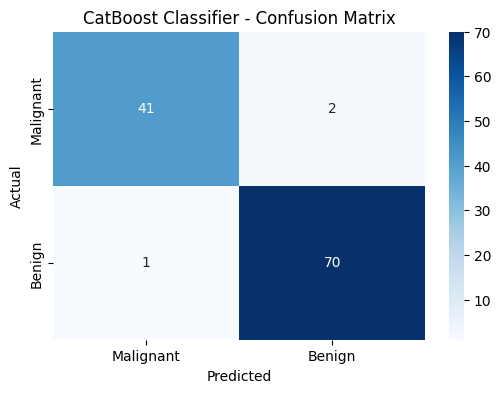

In [6]:
#9
#9
!pip install catboost
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    verbose=0
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred);

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Classifier - Confusion Matrix")
plt.show()

Best Parameters: {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
ROC-AUC Score: 0.4627594627594628

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       182
           1       0.23      0.17      0.19        18

    accuracy                           0.88       200
   macro avg       0.58      0.56      0.56       200
weighted avg       0.86      0.88      0.87       200



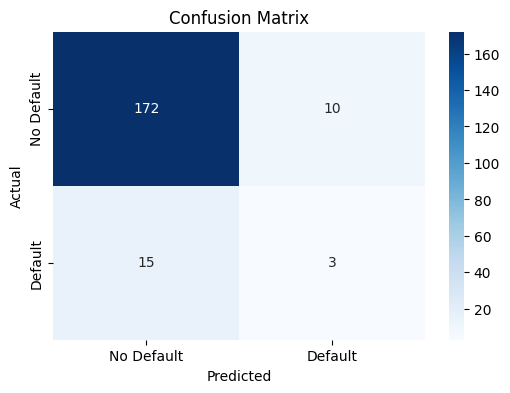

Precision-Recall AUC: 0.11166677092674974


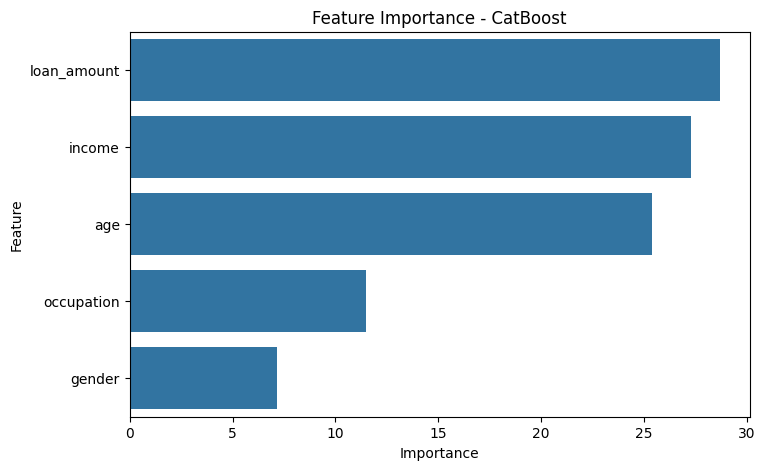

In [7]:
#10
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from catboost import CatBoostClassifier, Pool
import seaborn as sns
import matplotlib.pyplot as plt

# ========================
# 1. Load / simulate dataset
# ========================
# Example: replace this with your actual dataset
# For demonstration, we'll simulate a dataset with mixed types and imbalance
np.random.seed(42)
n_samples = 1000

# Numeric features
X_numeric = pd.DataFrame({
    'age': np.random.randint(18, 70, size=n_samples),
    'income': np.random.randint(20000, 150000, size=n_samples),
    'loan_amount': np.random.randint(1000, 50000, size=n_samples),
})

# Categorical features
X_categorical = pd.DataFrame({
    'gender': np.random.choice(['male', 'female'], size=n_samples),
    'occupation': np.random.choice(['salaried', 'self-employed', 'unemployed'], size=n_samples)
})

X = pd.concat([X_numeric, X_categorical], axis=1)

# Target variable (imbalanced: 10% defaults)
y = np.random.choice([0,1], size=n_samples, p=[0.9,0.1])

# ========================
# 2. Split data
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identify categorical columns
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# ========================
# 3. Handle class imbalance via class weights
# ========================
# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

# ========================
# 4. Train CatBoost Classifier
# ========================
# Initial model
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    cat_features=cat_features,
    class_weights=class_weights_dict,
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# ========================
# 5. Hyperparameter tuning (optional GridSearchCV)
# ========================
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

grid = GridSearchCV(
    estimator=CatBoostClassifier(
        iterations=500,
        eval_metric='AUC',
        cat_features=cat_features,
        class_weights=class_weights_dict,
        verbose=0,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)

# ========================
# 6. Predictions
# ========================
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# ========================
# 7. Evaluation Metrics
# ========================
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# ========================
# 8. Feature Importance
# ========================
feature_importances = best_model.get_feature_importance()
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - CatBoost")
plt.show()


10. Here’s a step-by-step data science pipeline tailored for predicting loan defaults in a FinTech context, considering an imbalanced dataset with missing values and mixed feature types.
1. Data Preprocessing & Handling Missing/Categorical Values
- Understand the data
- Handle missing values
- Encode categorical features
- Feature scaling
- Handle class imbalance
2. for this we use CatBoost because it hepl in Handles missing values and categorical features automatically.Supports class weighting for imbalanced datasets.Usually achieves high predictive performance on tabular data.
3. Hyperparameter Tuning Strategy
- Set a baseline
- Choose key hyperparameters to tune
- Tuning method
-Early stopping
4. Evaluation Metrics
5. How the Business Would Benefit
- Risk Reduction
-Targeted Interventions
-Operational Efficiency
-Revenue Growth
-Compliance & Transparency
